In [19]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Step 1: Data Preprocessing

### Load the dataset

In [20]:
DATA_PATH = Path("data/raw/Housing-Kaggle.csv")
df = pd.read_csv(
    DATA_PATH,
    low_memory=False  # avoids dtype guessing issues on wide CSVs
)

### Handle any missing data

__Top missing-value columns__

In [21]:
na_counts = df.isna().sum().sort_values()
na_pct = (na_counts / len(df)).round(3)
missing_summary = pd.DataFrame({"na_count": na_counts, "na_pct": na_pct})
missing_summary.head(20)

,na_count,na_pct
price,0,0.0
area,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
stories,0,0.0
mainroad,0,0.0
guestroom,0,0.0
basement,0,0.0
hotwaterheating,0,0.0
airconditioning,0,0.0


No missing values found; no imputation needed

### EDA (Exploratory Data Analysis)

__Numeric summary stats__

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


__Target distribution: `Price`__

Shows how prices are spread. If the right tail is long, the target is __right-skewed__

Skewed targets often benefit from modeling `log(price)`

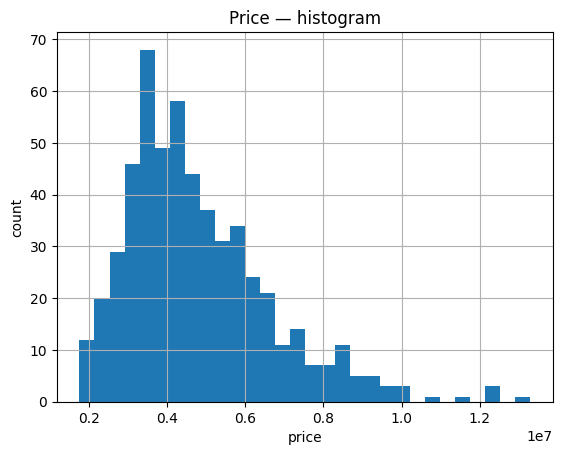

In [23]:
plt.figure()
df["price"].hist(bins=30)
plt.title("Price — histogram")
plt.xlabel("price"); plt.ylabel("count")
plt.savefig("outputs/figures/price_hist.png", dpi=160, bbox_inches="tight"); plt.show()

__Log target distribution: `log(price)`__

If this looks more bell-shaped than raw price, using `log(price)` can improve linear regression fit and stabilize errors

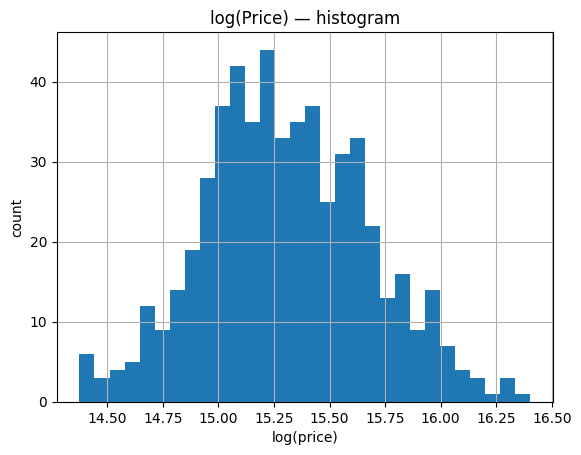

In [24]:
plt.figure()
np.log(df["price"]).hist(bins=30)
plt.title("log(Price) — histogram");
plt.xlabel("log(price)");
plt.ylabel("count")
plt.savefig("outputs/figures/log_price_hist.png", dpi=180, bbox_inches="tight");
plt.show()

## Step 2 Train a Linear Regression Model

### Split data into training and testing sets

In [25]:
X = df.drop("price", axis=1)
y = df["price"]

X = pd.get_dummies(X, drop_first=True)
X = X.fillna(X.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Train a linear regression model

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Step 3 Model Evaluation

### Evaluate the model using the test set

In [27]:
y_pred = model.predict(X_test)

### Calculate Mean Squared Error and R squared

In [28]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R squared: {r2}")

Mean Squared Error: 1151932265416.9653
R squared: 0.6485206497789258


### Graph predicted vs actual prices

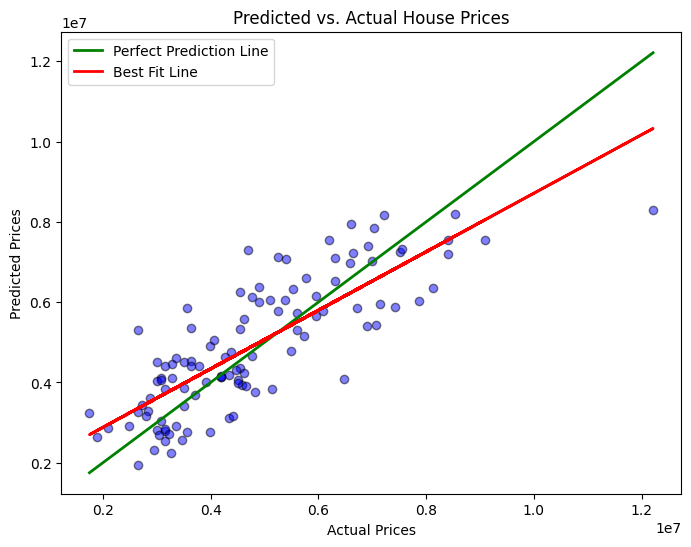

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", edgecolors="k")

#line if model was perfect
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="green", linewidth=2, label="Perfect Prediction Line")

# line of best fit
reg_line = LinearRegression()
reg_line.fit(y_test.values.reshape(-1, 1), y_pred) 

y_fit = reg_line.predict(y_test.values.reshape(-1, 1))

plt.plot(y_test, y_fit, color="red", linewidth=2, label="Best Fit Line")

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs. Actual House Prices")
plt.legend()
plt.show()

## Step 4 Analysis

Our model performed generally well. Our predicted values followed the trends of actual prices, but at higher price points the data is more scattered, indicating less accuracy. Our model underfits the data, since it is linear. It isn't able to capture all of the variations in the housing prices and data. The predictions were generally accurate, but the model tended to underestimate when it came to higher price points.